In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
! ls ../data.nosync 

spotify_competitor_tracks-updated_sep14.xlsx


### Spotify Audio Data

In [2]:
dataset = pd.read_csv('../data.nosync/spotify_competitor_tracks-updated_sep14.csv')

In [3]:
dataset.shape

(616631, 21)

In [4]:
dataset.describe()

,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back,Unnamed: 19,Unnamed: 20
count,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,616631.000000,6.166310e+05,616631.000000,0.0,0.0
mean,120.576207,0.610604,0.589961,-9.031985,0.476476,0.319832,0.113305,0.193630,5.295887,0.203845,3.901383,0.610235,21.717836,2.365461e+05,0.002608,NaN,NaN
std,28.978827,0.248157,0.178810,5.242935,0.261913,0.328773,0.154399,0.335937,3.583057,0.180314,0.446145,0.487697,15.087521,1.469106e+05,0.050999,NaN,NaN
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.181100e+04,0.000000,NaN,NaN
25%,98.091000,0.446000,0.476000,-10.874000,0.260000,0.025000,0.037200,0.000000,2.000000,0.095900,4.000000,0.000000,10.000000,1.808000e+05,0.000000,NaN,NaN
50%,120.939000,0.647000,0.612000,-7.705000,0.469000,0.188000,0.052700,0.000121,5.000000,0.126000,4.000000,1.000000,19.000000,2.161330e+05,0.000000,NaN,NaN
75%,138.062000,0.812000,0.724000,-5.628000,0.686000,0.582000,0.111000,0.217000,8.000000,0.258000,4.000000,1.000000,31.000000,2.633600e+05,0.000000,NaN,NaN
max,249.984000,1.000000,0.995000,4.776000,1.000000,0.996000,0.970000,1.000000,11.000000,1.000000,5.000000,1.000000,100.000000,8.647601e+06,1.000000,NaN,NaN


In [5]:
dataset.drop(['Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

What does the negative loud mean?

In [24]:
dataset.shape

(616631, 19)

In [21]:
dataset.isnull().any()

ISRC                False
SPOTIFY_ID          False
TITLE                True
ARTIST              False
TEMPO               False
ENERGY              False
DANCE               False
LOUD                False
VALENCE             False
ACOUSTIC            False
SPEECHINESS         False
INSTRUMENTALNESS    False
KEY                 False
LIVENESS            False
TIME_SIGNATURE      False
MODE                False
POP                 False
Seconds             False
Lean-Back           False
dtype: bool

In [27]:
dataset.ISRC.duplicated().sum()

65

In [33]:
#Duplicated Rows
dataset[dataset.duplicated(subset='ISRC', keep=False)].sort_values('ISRC')

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
166204,AULI01713550,2uWAfeJAGB6M98K9UJbKX0,Blood,City Calm Down,175.016,0.8730,0.3890,-5.759,0.2580,0.003370,0.1060,0.046300,11,0.1000,4,1,30,259595,0
166271,AULI01713550,2uWAfeJAGB6M98K9UJbKX0,Blood,City Calm Down,175.016,0.8730,0.3890,-5.759,0.2580,0.003370,0.1060,0.046300,11,0.1000,4,1,30,259595,0
226980,BXBPF1700001,4Z1DRMny2CZ8wmHgVApQaM,Canudo,Douglas e Henrique,129.749,0.5630,0.7010,-7.819,0.8010,0.711000,0.2900,0.000000,7,0.2920,4,1,25,185766,0
226978,BXBPF1700001,4Z1DRMny2CZ8wmHgVApQaM,Canudo,Douglas e Henrique,129.749,0.5630,0.7010,-7.819,0.8010,0.711000,0.2900,0.000000,7,0.2920,4,1,25,185766,0
73150,CA5KR1809310,5IhYi7Dq247vMoGPQoAhzq,Rave,Parker,144.910,0.9820,0.5650,-1.335,0.2810,0.091400,0.0896,0.737000,4,0.2340,4,0,40,172137,0
73342,CA5KR1809310,5IhYi7Dq247vMoGPQoAhzq,Rave,Parker,144.910,0.9820,0.5650,-1.335,0.2810,0.091400,0.0896,0.737000,4,0.2340,4,0,40,172137,0
354816,CA6D21800101,0G5XDrOZIJFTUan9IDyPqd,#195 - Monstercat: Call of the Wild,Monstercat,107.560,0.8530,0.4540,-3.375,0.2940,0.023300,0.1180,0.003860,8,0.9030,4,1,16,3658184,0
354798,CA6D21800101,66hv7YUiFEnWxgIY7Vg9aj,#195 - Monstercat: Call of the Wild,Monstercat,174.016,0.8470,0.3050,-4.056,0.2460,0.008910,0.1540,0.002070,5,0.3720,4,0,16,3627886,0
25115,CABD61705401,6cuSWDG6TiB7a5l708ulz5,Everything Is Alright,The Glorious Sons,128.880,0.7250,0.5640,-3.858,0.2420,0.004590,0.0332,0.000000,9,0.1100,4,0,51,193325,0
25135,CABD61705401,42lrhaZzqJqCYHlfQTGozP,Everything Is Alright,The Glorious Sons,128.880,0.7250,0.5640,-3.858,0.2420,0.004590,0.0332,0.000000,9,0.1100,4,0,51,193325,0


There are duplicates in the ISRC's but they seem to be the same tracks with the same audio features

In [23]:
dataset.TITLE[dataset.TITLE.isnull()]

413237    NaN
Name: TITLE, dtype: object

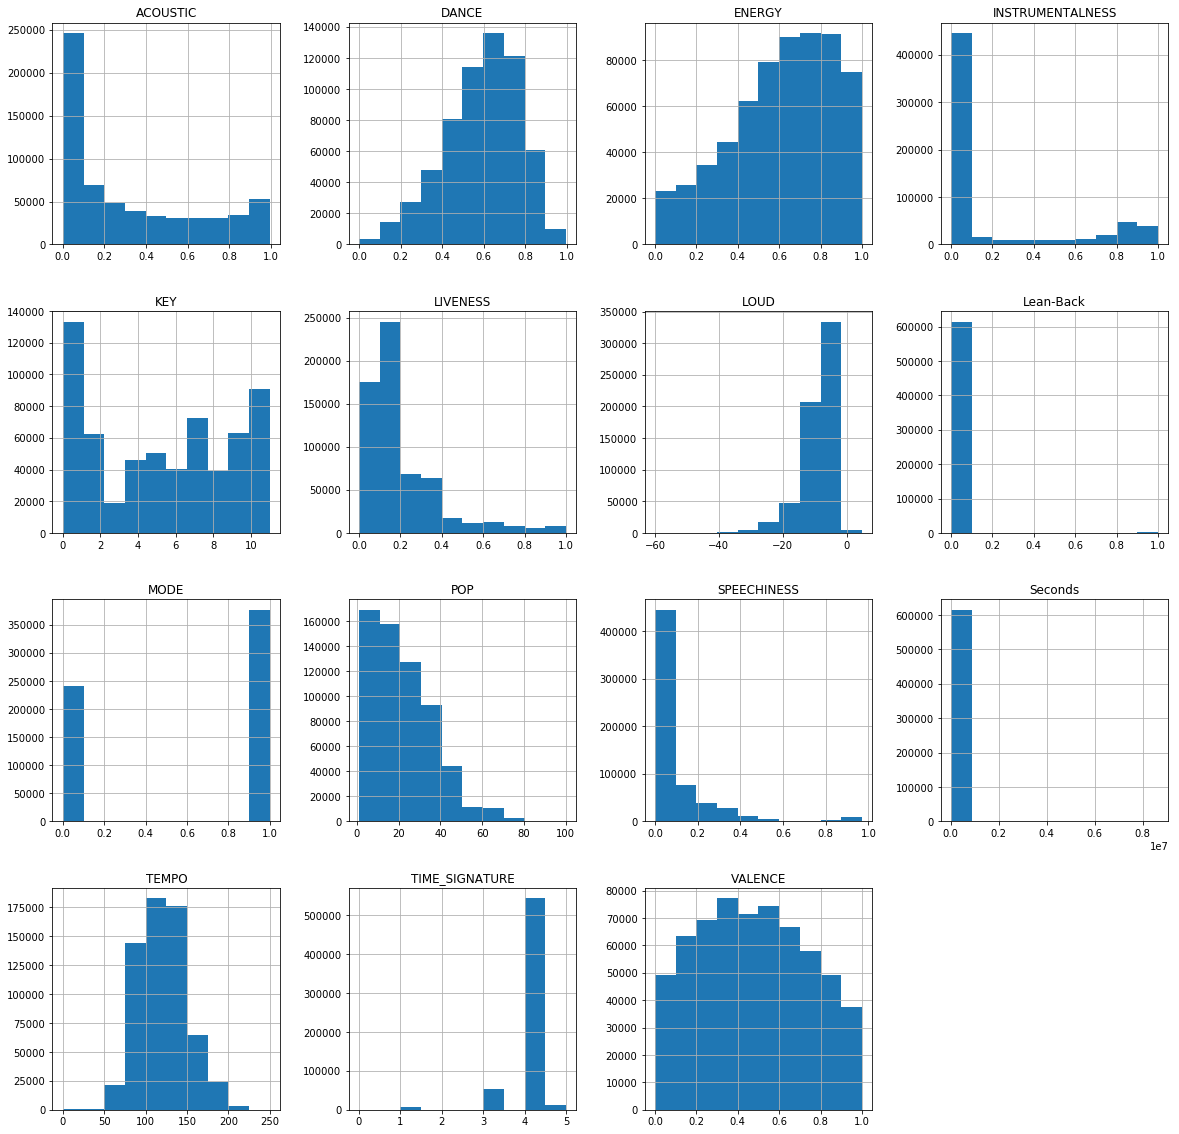

In [20]:
dataset.hist(figsize=(20,20))
plt.show()

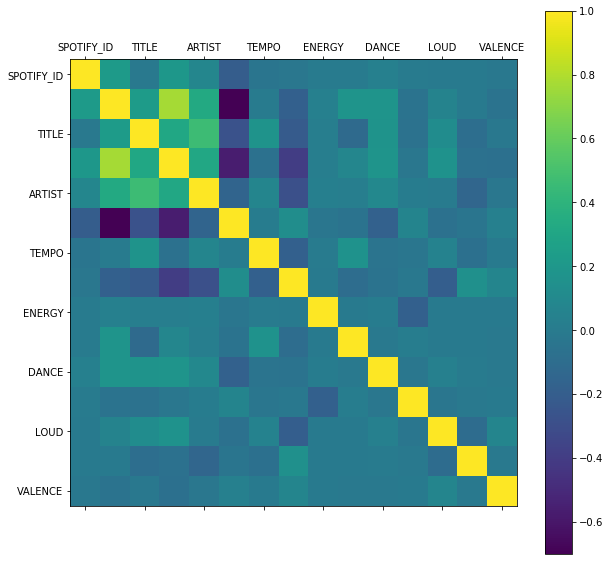

In [53]:
alpha= dataset.columns.values

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()
plt.show()

### Max popularity by tracks

In [6]:
max_popularity = pd.read_csv('../data.nosync/max popularity by track.csv', low_memory=False)

In [7]:
max_popularity.shape

(2458710, 3)

In [59]:
max_popularity.head()

,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [60]:
max_popularity.duplicated().any()

False

No duplicated rows here

In [65]:
max_popularity.isnull().any()

track_id             False
track_external_id    False
max_popularity       False
dtype: bool

In [8]:
dropped_rows = max_popularity[max_popularity.max_popularity=="\\N"]

max_pop = max_popularity[max_popularity.max_popularity!="\\N"]

max_pop['max_popularity'] = pd.to_numeric(max_pop['max_popularity'])

/Users/ksenia/anaconda/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [75]:
len(dropped_rows)

38

In [72]:
#Rows containing sentinel values
dropped_rows

,track_id,track_external_id,max_popularity
31984,artist,Zion & Lennox,\N
104828,artist,Miguel Martinez,\N
175012,artist,Reykon,\N
181722,artist,Nacho,\N
297989,artist,Ozuna,\N
309392,artist,Justin Bieber,\N
388438,artist,Sebastian Yatra,\N
444886,artist,J Alvarez,\N
452918,artist,Cosculluela,\N
507726,artist,Nicky Jam,\N


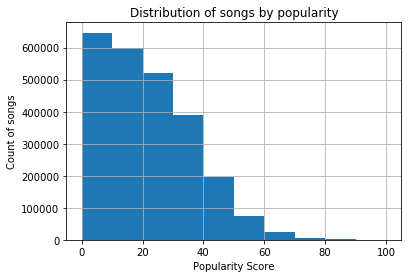

In [9]:
max_pop.max_popularity.hist()
plt.title('Distribution of songs by popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count of songs')
plt.show()

### Weekly Viral and Top 200

In [83]:
viral_top_200 = pd.read_csv('../data.nosync/weekly viral & top 200.csv')

In [84]:
viral_top_200.shape

(8265, 8)

In [85]:
viral_top_200.isnull().any()

chart_type     False
window_type    False
day            False
track_url      False
artist         False
track          False
num_streams    False
rank_order     False
dtype: bool

In [86]:
viral_top_200.duplicated().any()

False

In [87]:
viral_top_200.head()

,chart_type,window_type,day,track_url,artist,track,num_streams,rank_order
0,Viral 50,weekly,20180712,https://open.spotify.com/track/4B2kIC5F0kSVfTD...,Peter CottonTale,Forever Always,\N,31
1,Viral 50,weekly,20180712,https://open.spotify.com/track/1t4pPnbkOjzoA5R...,BROCKHAMPTON,1999 WILDFIRE,\N,4
2,Top 200,weekly,20180712,https://open.spotify.com/track/0tgVpDi06FyKpA1...,Ed Sheeran,Perfect,1549254,180
3,Top 200,weekly,20180712,https://open.spotify.com/track/2ekn2ttSfGqwhha...,Dua Lipa,New Rules,1594807,169
4,Top 200,weekly,20180712,https://open.spotify.com/track/1rfofaqEpACxVEH...,Camila Cabello,Havana,1974470,126


In [89]:
viral_top_200.chart_type.value_counts()

Top 200     6615
Viral 50    1650
Name: chart_type, dtype: int64

Why some of these have rank order yet no streams?

In [88]:
viral_50 = viral_top_200[viral_top_200.chart_type=='Viral 50']

In [90]:
top_200 = viral_top_200[viral_top_200.chart_type=='Top 200']

In [92]:
viral_50.shape

(1650, 8)

In [93]:
1650/50

33.0

In [94]:
top_200.shape

(6615, 8)

In [103]:
print('Start of tracking', viral_50.day.min())
print ('End of tracking', viral_50.day.max())

Start of tracking 20180201
End of tracking 20180920


In [107]:
viral_50.num_streams.value_counts()

\N    1650
Name: num_streams, dtype: int64

### A level artists

In [10]:
a_level = pd.read_csv('../data.nosync/a_level_artists.csv')

In [113]:
a_level.shape

(484656, 10)

In [114]:
a_level.isnull().any()

artist_id                  False
artist_name                 True
number_of_tracks           False
number_of_albums           False
number_of_playlists        False
playlist_followers         False
highest_song_popularity    False
average_song_popularity    False
A_Level_Artist?            False
B_Level Artist?            False
dtype: bool

In [115]:
a_level[a_level.artist_name.isnull()]

,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
32290,4oPYazJJ1o4rWBrTw9lm40,NaN,201,104,262,517978,45,18.200000,0,0
138178,336J9TqhCvat0QFIzI0lHW,NaN,1,1,5,8008,27,27.000000,0,0
145479,09UyWByceOY8XMjrbkmWhT,NaN,1,1,3,1269,26,26.000000,0,0
220044,2uXBg2rcDk1gFkZXi73InJ,NaN,21,12,33,22390,15,0.435294,0,0
409185,\N,NaN,1,0,1,992,0,0.000000,0,0


In [11]:
#A-level artists
a_level_artists = a_level[a_level['A_Level_Artist?']==1]
print(a_level_artists.shape)
a_level_artists

(18, 10)


,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
0,3TVXtAsR1Inumwj472S9r4,Drake,263,255,39875,710070329,100,55.859119,1,0
4,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,122,107,16642,299194507,97,68.611220,1,0
10,1vyhD5VmyZ7KMfW5gqLgo5,J Balvin,142,134,16011,327344171,96,60.313959,1,0
19,53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,96,103,17862,320824561,94,46.249152,1,0
20,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,90,111,16909,299851278,94,56.758209,1,0
21,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,53,63,13891,239489536,94,75.759802,1,0
23,7dGJo4pcD2V6oG8kP0tJRR,Eminem,323,218,17834,272021225,93,51.362384,1,0
34,1r4hJ1h58CWwUQe3MxPuau,Maluma,154,148,13455,354259729,91,56.624961,1,0
46,3fMbdgg4jU18AjLCKBhRSm,Michael Jackson,389,245,13343,218339308,89,54.587846,1,0
50,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,168,143,29212,462977981,89,70.555718,1,0


In [12]:
#B-level artists
b_level_artists = a_level[a_level['B_Level Artist?']==1]
print(b_level_artists.shape)
b_level_artists

(148, 10)


,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
1,6LuN9FCkKOj5PcnpouEgny,Khalid,46,56,13841,378377698,98,75.597498,0,1
2,3wyVrVrFCkukjdVIdirGVY,Lil Pump,34,32,6003,191866217,98,68.586418,0,1
5,7EQ0qTo7fWT7DPxmxtSYEc,Bastille,97,84,7999,170374809,97,54.174138,0,1
11,15UsOTVnJzReFVN1VCnxy4,XXXTENTACION,97,49,9812,276770428,96,71.821703,0,1
12,4DdkRBBYG6Yk9Ka8tdJ9BW,Offset,80,88,5479,108170339,96,67.427468,0,1
13,1anyVhU62p31KFi8MEzkbf,Chance the Rapper,56,61,7950,127771477,96,66.970088,0,1
14,6S2OmqARrzebs0tKUEyXyp,Demi Lovato,203,178,17716,197490434,95,49.938979,0,1
15,246dkjvS1zLTtiykXe5h60,Post Malone,47,38,11901,177746235,95,62.300172,0,1
18,1SupJlEpv7RS2tPNRaHViT,Nicky Jam,221,219,11753,188057260,94,57.391016,0,1
22,4kYSro6naA4h99UJvo89HB,Cardi B,49,46,10510,286731593,94,71.882660,0,1


In [131]:
a_level.columns

Index(['artist_id', 'artist_name', 'number_of_tracks', 'number_of_albums',
       'number_of_playlists', 'playlist_followers', 'highest_song_popularity',
       'average_song_popularity', 'A_Level_Artist?', 'B_Level Artist?'],
      dtype='object')

### New Sep test tracks

In [133]:
sep_tracks = pd.read_csv('../data.nosync/new Sep test tracks.csv')

In [134]:
sep_tracks.shape

(33087, 19)

In [135]:
sep_tracks.head()

,Unnamed: 0,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds
0,0,CA5KR1822869,3TpzJhNQkrRsXjhGohzDFT,Ghost Bike,Danny Kolk,123.988,0.693,0.910,-6.977,0.4880,0.000291,0.0612,0.338000,11,0.6710,4,0,12.0,348461
1,1,GB8MX1800501,3JLckRYYF43OrZlYD2ug3V,Disturbing the Peace,ARLO,159.961,0.796,0.605,-4.675,0.7210,0.068600,0.0509,0.000000,11,0.1210,4,1,22.0,189000
2,2,GBCBR1800052,4BajhAu1cfL1vgGxECLj8l,Take It All,The Magpie Salute,124.076,0.939,0.315,-2.937,0.5690,0.005480,0.0640,0.000001,7,0.0371,4,1,25.0,204680
3,3,NLSB71800098,2CW42rwqjVOWpO8iptN3Mh,Let Me Live,FATHERDUDE,79.955,0.565,0.786,-7.694,0.5780,0.006920,0.0952,0.000017,1,0.0315,4,0,27.0,196511
4,4,QZDA41848928,0UwqokN2BhA4EPv5uRNvmY,Rain,Kalih,120.010,0.417,0.877,-11.433,0.0403,0.641000,0.0527,0.750000,1,0.1110,4,0,27.0,240741


In [136]:
sep_tracks.shape

(33087, 19)

### Merging datasets

In [13]:
dataset.head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619,0.833,-5.822,0.366,0.0496,0.0971,0.000087,8,0.300,4,1,100,217925,0
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503,0.552,-6.759,0.141,0.1380,0.1450,0.000555,5,0.143,4,0,100,218480,0
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579,0.686,-5.813,0.352,0.3340,0.0442,0.000000,10,0.135,4,1,100,231266,0
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899,0.603,-6.558,0.813,0.1050,0.1410,0.000431,8,0.106,4,1,100,210925,0
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451,0.758,-9.454,0.353,0.0273,0.1040,0.000095,7,0.566,4,1,100,198960,0


In [24]:
dataset.shape

(616631, 19)

In [139]:
dataset.SPOTIFY_ID.duplicated().any()

True

In [25]:
#Merge audio and popularity
merged_frame = dataset.merge(max_popularity, how='inner', left_on = 'SPOTIFY_ID', right_on = 'track_id')

In [26]:
merged_frame.shape

(613149, 22)

In [27]:
merged_frame.head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,...,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back,track_id,track_external_id,max_popularity
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619,0.833,-5.822,0.366,0.0496,...,8,0.300,4,1,100,217925,0,0h1W19pS59KtEd7aDzF58i,USCM51800207,62
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503,0.552,-6.759,0.141,0.1380,...,5,0.143,4,0,100,218480,0,29VZKgZvAjFRxxBnctjqOn,USUM71710097,63
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579,0.686,-5.813,0.352,0.3340,...,10,0.135,4,1,100,231266,0,3AISCGqWZmb6UPxoYrXaA9,USUM71805184,67
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899,0.603,-6.558,0.813,0.1050,...,8,0.106,4,1,100,210925,0,7liAO2OqrFMVvM7oiLo0m0,USCM51800078,69
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451,0.758,-9.454,0.353,0.0273,...,7,0.566,4,1,100,198960,0,61T2H6w0ggQdhCvVegLl99,USCM51800005,73


In [41]:
#Sort by spotify id and then by popularity to drop duplicates
sorted_frame = merged_frame.sort_values(['SPOTIFY_ID', 'max_popularity'])

In [42]:
#Drop duplicates and keep first, corresponding to the max popularity
dedup_merged = sorted_frame.drop_duplicates(subset='SPOTIFY_ID', keep='first')

In [43]:
dedup_merged.SPOTIFY_ID.duplicated().any()

False

In [31]:
#We still have duplicated ISRC code
dedup_merged.ISRC.duplicated().any()

True

In [49]:
a_level_artists.artist_name.values

array(['Drake', 'Travis Scott', 'J Balvin', 'Imagine Dragons',
       'Ariana Grande', 'Dua Lipa', 'Eminem', 'Maluma', 'Michael Jackson',
       'Ed Sheeran', 'Nicki Minaj', 'Kendrick Lamar', 'BeyoncÃ©',
       'Coldplay', 'Bruno Mars', 'Justin Bieber', 'Rihanna', 'Lil Wayne'], dtype=object)

In [51]:
#Excluding a level artists
ex_a_levels = dedup_merged[~dedup_merged.ARTIST.isin(a_level_artists.artist_name.values)]

In [52]:
#Convert string to integer
ex_a_levels.max_popularity = pd.to_numeric(ex_a_levels.max_popularity)

/Users/ksenia/anaconda/envs/nlp/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


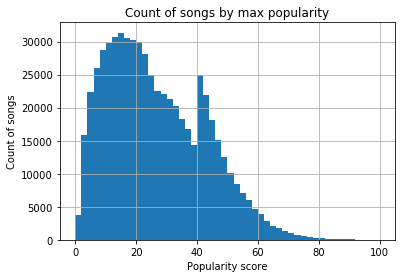

In [53]:
ex_a_levels.max_popularity.hist(bins=50)
plt.title('Count of songs by max popularity')
plt.xlabel('Popularity score')
plt.ylabel('Count of songs')
plt.show()

In [54]:
#Mean
ex_a_levels.max_popularity.mean()

26.12865885718578

In [55]:
#Median
ex_a_levels.max_popularity.median()

23.0

### Share of artists by popularity

In [79]:
#Share of artists by popularity
ex_a_levels[ex_a_levels.max_popularity>23].shape[0]/ex_a_levels.shape[0]

0.4980781100490188

In [58]:
ex_a_levels.ISRC.duplicated().any()

True

In [59]:
ex_a_levels.SPOTIFY_ID.duplicated().any()

False

In [61]:
ex_a_levels[ex_a_levels.ISRC.duplicated()]

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,...,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back,track_id,track_external_id,max_popularity
218822,uscgj1859073,26S7IezaYu3Esm9Ec4z1tw,Nocturne Lullaby,Marcin Brzozowski,71.747,0.0189,0.391,-28.711,0.0987,0.991000,...,4,0.0529,3,0,26,595845,0,26S7IezaYu3Esm9Ec4z1tw,uscgj1824253,11
79951,USYFZ1790208,27apqpztLmszfMUFEAUa2g,Forgive Me Mother,The Relentless,180.062,0.6650,0.344,-6.725,0.1410,0.000543,...,4,0.1010,3,0,39,240666,0,27apqpztLmszfMUFEAUa2g,USYFZ1790208,46
156918,GB-SMU-44-61744,3WiziXMiv3u98LYkWPdXLh,Wasting Time,CASTLEBEAT,169.947,0.7840,0.463,-9.414,0.6100,0.318000,...,11,0.1400,4,0,31,185524,0,3WiziXMiv3u98LYkWPdXLh,GB-SMU-44-61744,32
98874,GB-SMU-47-54520,4RqVsGYERv5pmwVroKWPiu,I Follow,CASTLEBEAT,146.051,0.5710,0.491,-8.381,0.6000,0.306000,...,9,0.0868,4,1,37,156367,0,4RqVsGYERv5pmwVroKWPiu,GB-SMU-48-68574,32
280782,THG011000416,4i3BvbAjqcvVfeMwQXFsYI,à¸ªà¸²à¸¢à¸•à¸²à¸„à¸¹à¹ˆà¸™à¸±à¹‰à¸™ (à¹€à¸žà¸...,Panadda Ruangwut,140.055,0.3110,0.570,-11.294,0.2020,0.589000,...,0,0.1740,4,0,21,231333,0,4i3BvbAjqcvVfeMwQXFsYI,THG011000416,25
253695,UKLVE1800288,53SDXvxzcfdnKmpDrg20fB,I C U,Qubiko,121.992,0.5820,0.824,-7.599,0.1920,0.002200,...,11,0.6460,4,1,23,480000,0,53SDXvxzcfdnKmpDrg20fB,GBEK51800325,19
219745,USLD91713586,5GRDZ7LL6zj6OqaCoNmwsq,Kalbinden Vur,Bankai Project,92.025,0.8140,0.706,-8.363,0.1330,0.057300,...,1,0.0760,4,1,26,210875,0,5GRDZ7LL6zj6OqaCoNmwsq,USLD91712417,32
352765,CA6D21800101,66hv7YUiFEnWxgIY7Vg9aj,#195 - Monstercat: Call of the Wild,Monstercat,174.016,0.8470,0.305,-4.056,0.2460,0.008910,...,5,0.3720,4,0,16,3627886,0,66hv7YUiFEnWxgIY7Vg9aj,CA6D21800101,22
203394,uscgj1864037,6IakZsqzSroni4hPfL9guN,Presidential Silver Lining (Live),John Craigie,118.033,0.2960,0.597,-7.478,0.6230,0.711000,...,8,0.7380,4,1,27,297252,0,6IakZsqzSroni4hPfL9guN,uscgj1864037,22
112821,USUYG1150382,6OwK24GquuADL0CginA34Z,Jumpin',Derek Minor,130.128,0.6770,0.699,-7.731,0.3310,0.005740,...,2,0.0616,4,1,35,192461,0,6OwK24GquuADL0CginA34Z,USUYG1150382,53


In [70]:
#Get rid of duplicates
ex_dups = ex_a_levels.sort_values(['ISRC', 'max_popularity']).drop_duplicates(subset='ISRC', keep='first')

In [71]:
ex_dups.shape

(612405, 22)

### Design matrix set up - binary

In [182]:
THRESHOLD=50

design_matrix = ex_dups
design_matrix['Target'] = (design_matrix.max_popularity>=THRESHOLD)*1

In [183]:
design_matrix[design_matrix['Target']==0].shape[0]/design_matrix.shape[0]

0.9152423641217822

In [184]:
design_matrix.columns

Index(['ISRC', 'SPOTIFY_ID', 'TITLE', 'ARTIST', 'TEMPO', 'ENERGY', 'DANCE',
       'LOUD', 'VALENCE', 'ACOUSTIC', 'SPEECHINESS', 'INSTRUMENTALNESS', 'KEY',
       'LIVENESS', 'TIME_SIGNATURE', 'MODE', 'POP', 'Seconds', 'Lean-Back',
       'track_id', 'track_external_id', 'max_popularity', 'Target'],
      dtype='object')

In [185]:
design_matrix = design_matrix[['TEMPO', 'ENERGY', 'DANCE', 'LOUD', 'VALENCE', 'ACOUSTIC',
                              'SPEECHINESS', 'INSTRUMENTALNESS', 'KEY',
                               'LIVENESS', 'TIME_SIGNATURE', 'MODE', 'Seconds', 'Lean-Back',
                              'Target', 'max_popularity']]

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
class_tree = DecisionTreeClassifier(max_depth = 10)

y = design_matrix.Target
X = design_matrix.drop(['Target', 'max_popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
class_tree.fit(X_train, y_train)

y_hat = class_tree.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_hat))
print('Recall', recall_score(y_test, y_hat))

Accuracy 0.916323758018
Recall 0.0156566443371


### Set up quick Decision Tree Regression model

In [168]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score

In [94]:
tree = DecisionTreeRegressor(max_depth = 10)

In [138]:
y = design_matrix.max_popularity
X = design_matrix.drop(['Target', 'max_popularity', 'POP'], axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [140]:
y_hat = tree.predict(X_test)

In [141]:
y_hat

array([ 20.59990958,  15.90378647,  29.0450964 , ...,  30.7279177 ,
        35.32059957,  21.73066667])

In [142]:
mean_squared_error(y_test, y_hat)

218.19707741878383

In [143]:
r2_score(y_test, y_hat)

0.13165034426035482

In [144]:
X.columns

Index(['TEMPO', 'ENERGY', 'DANCE', 'LOUD', 'VALENCE', 'ACOUSTIC',
       'SPEECHINESS', 'INSTRUMENTALNESS', 'KEY', 'LIVENESS', 'TIME_SIGNATURE',
       'MODE', 'Seconds', 'Lean-Back'],
      dtype='object')

In [145]:
for i in sorted(zip(X.columns, tree.feature_importances_.round(4)), key = lambda t: -t[1]):
    print(i)

('INSTRUMENTALNESS', 0.26519999999999999)
('LOUD', 0.1651)
('Seconds', 0.13880000000000001)
('VALENCE', 0.1308)
('DANCE', 0.1026)
('SPEECHINESS', 0.059700000000000003)
('Lean-Back', 0.058400000000000001)
('ENERGY', 0.029899999999999999)
('ACOUSTIC', 0.026599999999999999)
('TEMPO', 0.0126)
('LIVENESS', 0.0066)
('TIME_SIGNATURE', 0.0016000000000000001)
('KEY', 0.0011999999999999999)
('MODE', 0.00089999999999999998)


In [146]:
ex_a_levels.POP.corr(ex_a_levels.max_popularity)

0.88945378018733134